# 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

# 2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [98]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 2.2 Dataset information
* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

In [99]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values

In [100]:
df.duplicated().sum()

0

There are no duplicate values

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [102]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [103]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [104]:
print('Categories in gender col : ' , end='')
print(df['gender'].unique())
print(f'Categories in race_ethnicity col : ' , end='')
print(df['race_ethnicity'].unique())
print(f'Categories in parental level of education col : ' , end='')
print(df['parental_level_of_education'].unique())
print(f'Categories in lunch col : ' , end='')
print(df['lunch'].unique())
print(f'Categories in test preparation method col : ' , end='')
print(df['test_preparation_course'].unique())

Categories in gender col : ['female' 'male']
Categories in race_ethnicity col : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education col : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch col : ['standard' 'free/reduced']
Categories in test preparation method col : ['none' 'completed']


In [105]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [106]:
# Numerical & Categorical feature
num_feat = [features for features in df.columns if df[features].dtype!='object']
cat_feat = [features for features in df.columns if df[features].dtype=='object']
print(f'Numerical Features : {num_feat}')
print(f'Categorical Features : {cat_feat}')

Numerical Features : ['math_score', 'reading_score', 'writing_score']
Categorical Features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [107]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Feature Engineering

In [108]:
df['total score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='average', ylabel='Count'>

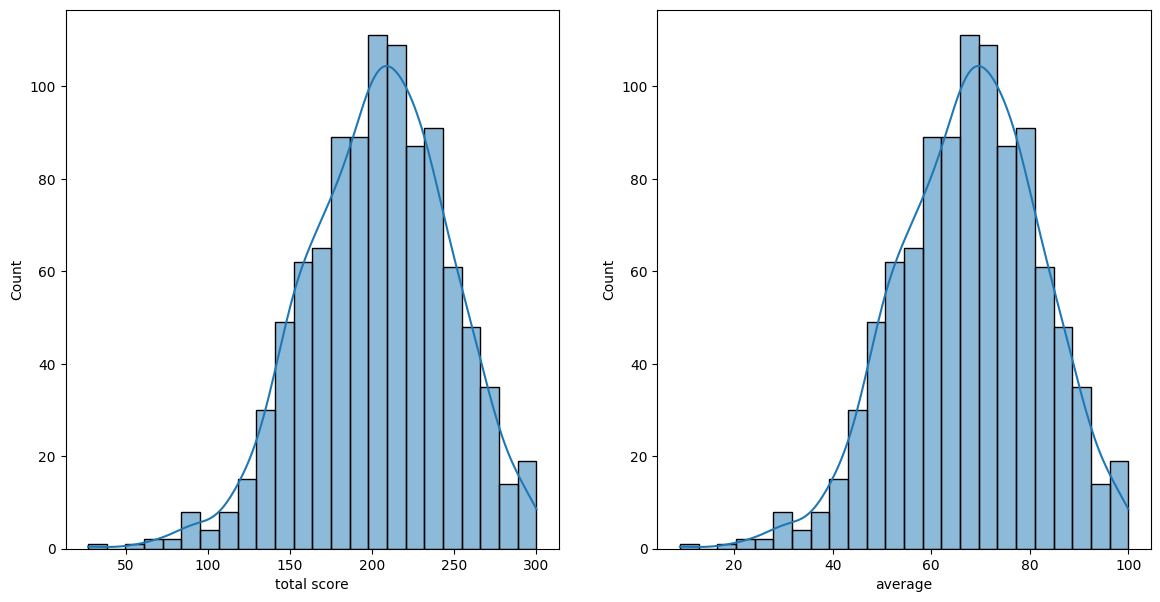

In [109]:
fig , ax = plt.subplots(1 , 2 , figsize=(14,7))

plt.subplot(121)
sns.histplot(data=df , x='total score' , kde=True)

plt.subplot(122)
sns.histplot(data=df , x='average' , kde=True)

* Both total score and average follow same distribution so we can use any of them

<Axes: xlabel='average', ylabel='Count'>

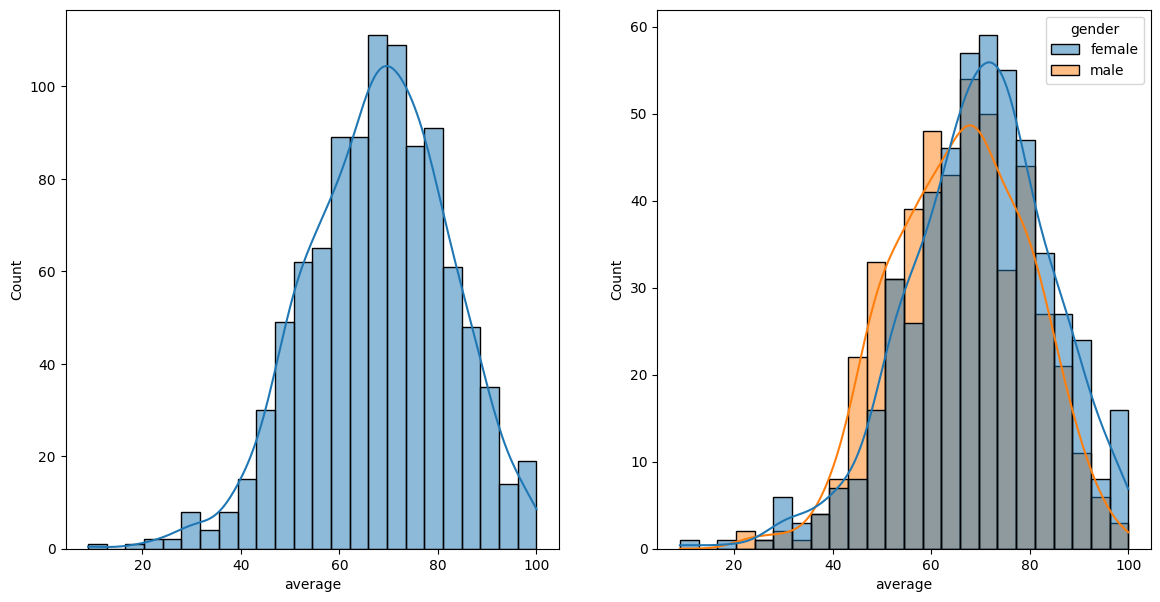

In [110]:
fig , axs = plt.subplots(1,2,figsize=(14,7))
plt.subplot(121)
sns.histplot(data=df , x='average' , kde=True)
plt.subplot(122)
sns.histplot(data=df , x='average' , kde=True , hue='gender')

* We can observe that female students tend to perform better than male students

<Axes: xlabel='average', ylabel='Count'>

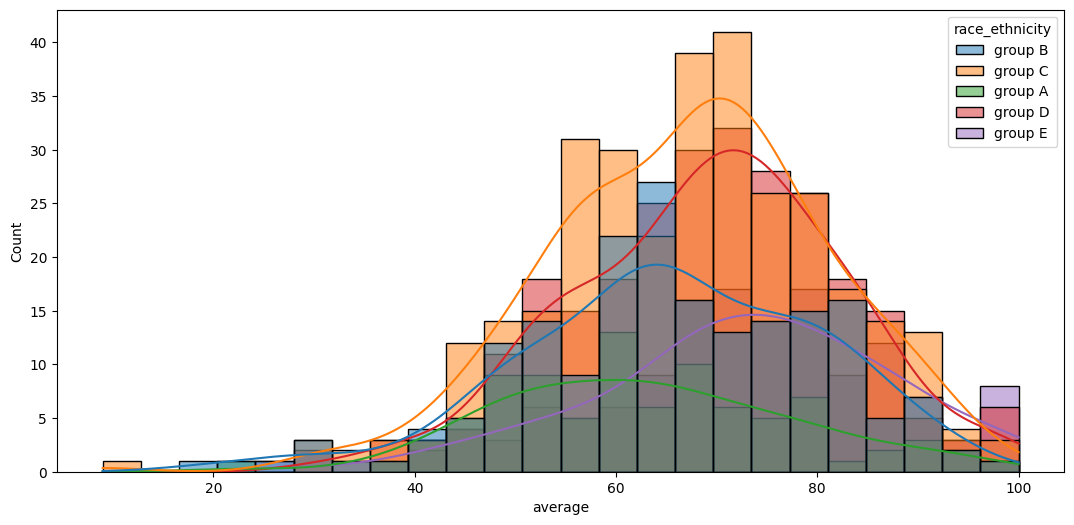

In [111]:
plt.figure(figsize=(13,6))
sns.histplot(data=df , x='average' , hue='race_ethnicity' , kde=True)

* Students of group A & B score lesser than other groups

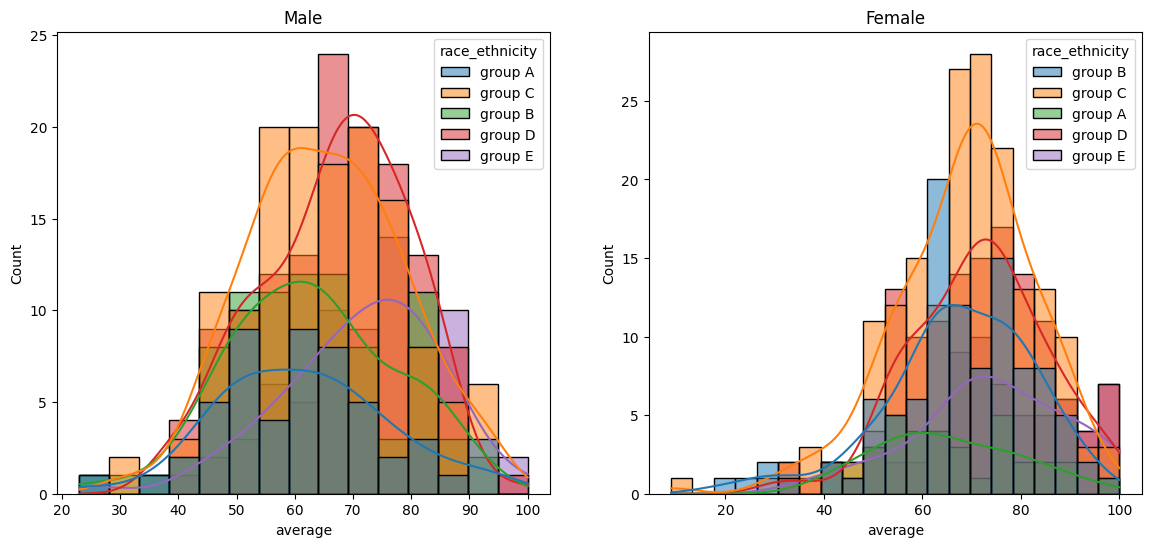

In [112]:
plt.subplots(1,2,figsize=(14,6))
plt.subplot(121)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.title('Male')
plt.subplot(122)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.title('Female')
plt.show()

* Same pattern is also for each gender , but for male group C also score less

<Axes: xlabel='average', ylabel='Count'>

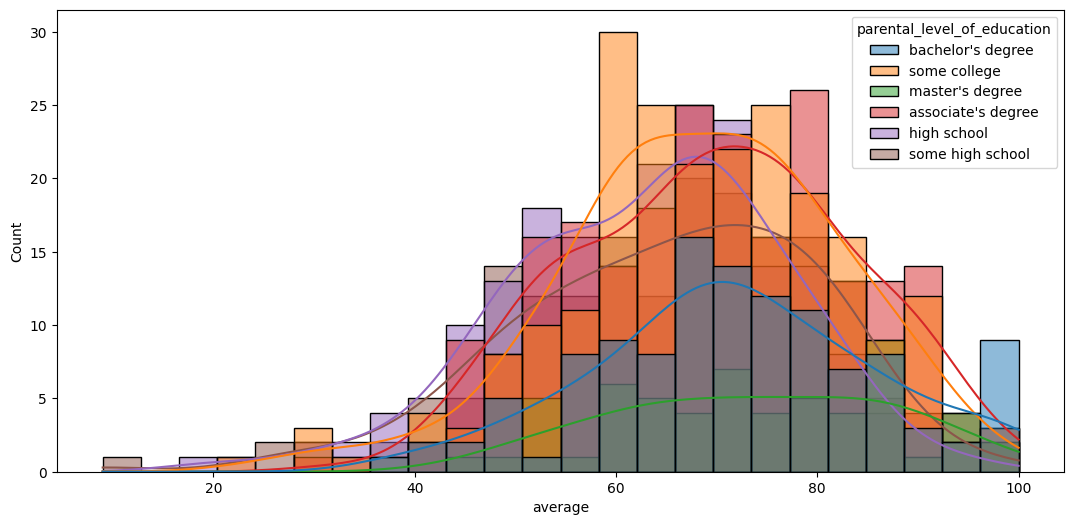

In [113]:
plt.figure(figsize=(13,6))
sns.histplot(data=df , x='average' , hue='parental_level_of_education' , kde=True)

* Student's performance seems to be independent of parental education

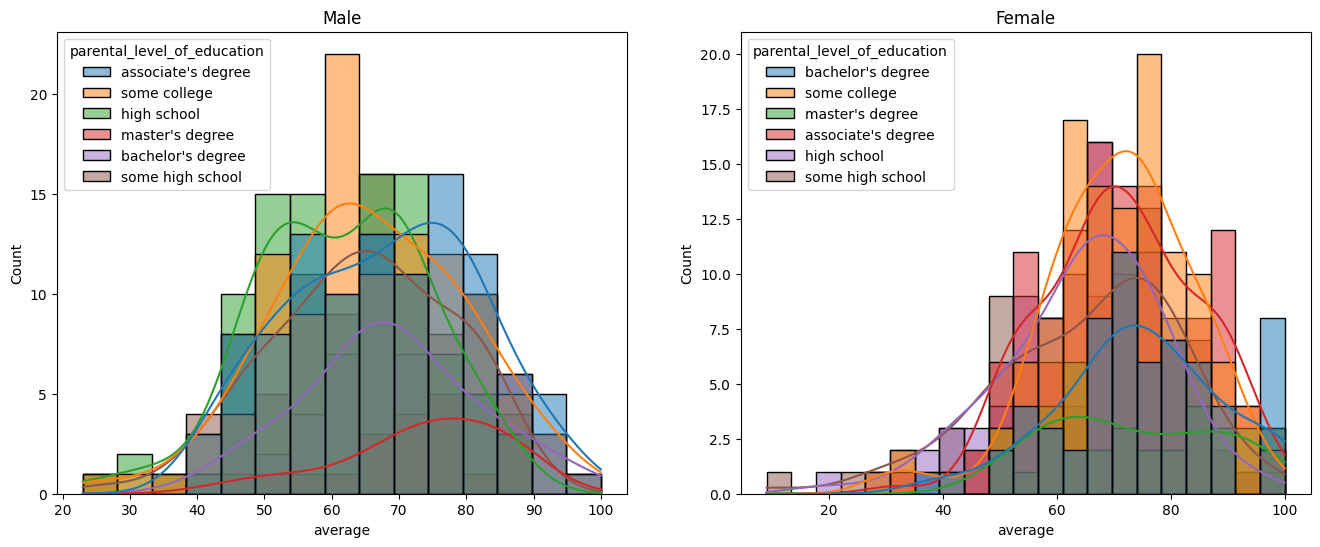

In [114]:
plt.subplots(1,2,figsize=(25,6))

plt.subplot(131)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.title('Male')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.title('Female')
plt.show()

* Here also same trend is followed for each gender except the male students whose parent's education level is of master's degree or associate degree

<Axes: xlabel='average', ylabel='Count'>

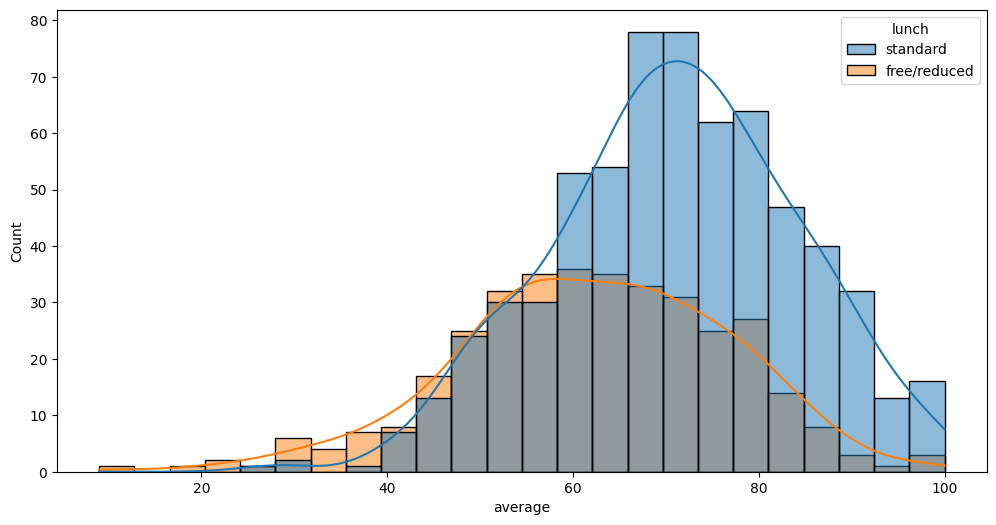

In [115]:
plt.figure(figsize=(12,6))
sns.histplot(data=df , x='average' , hue='lunch' , kde=True)

Text(0.5, 1.0, 'Female')

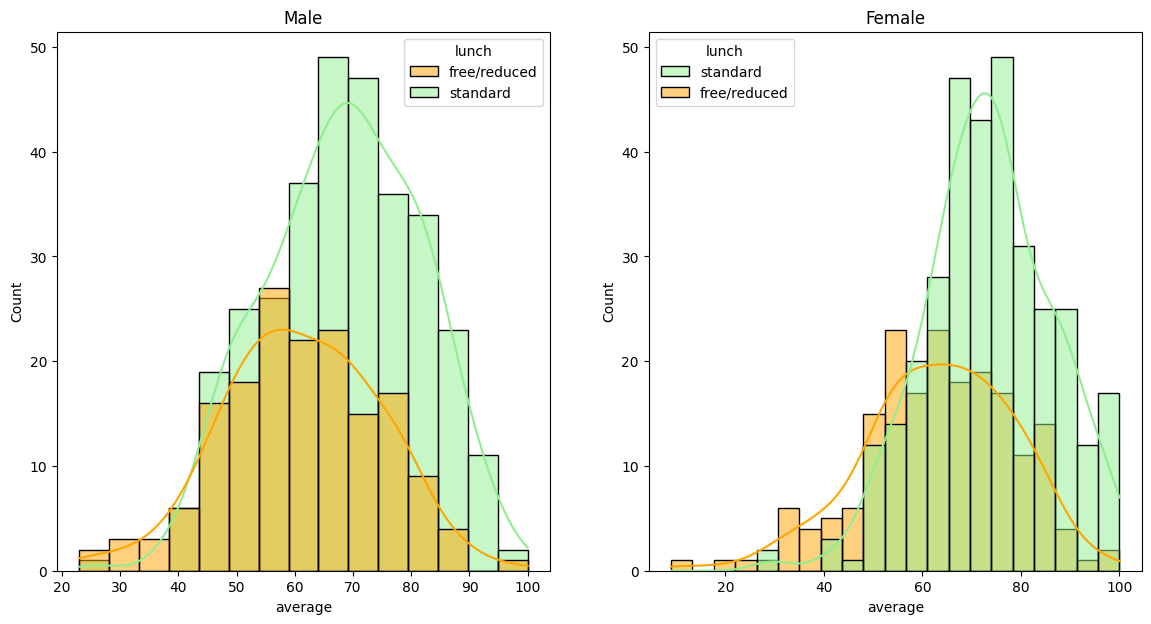

In [116]:
palette = {'standard': 'lightgreen', 'free/reduced': 'orange'}

fig , ax = plt.subplots(1,2 , figsize=(14,7))
plt.subplot(121)
sns.histplot(data=df[df['gender']=='male'] , x='average' , hue='lunch' , kde=True , palette=palette)
plt.title('Male')

plt.subplot(122)
sns.histplot(data=df[df['gender']=='female'] , x='average' , hue='lunch' , kde=True , palette=palette)
plt.title('Female')

* Students having standard lunch perform better irrespective of gender

<Axes: xlabel='average', ylabel='Count'>

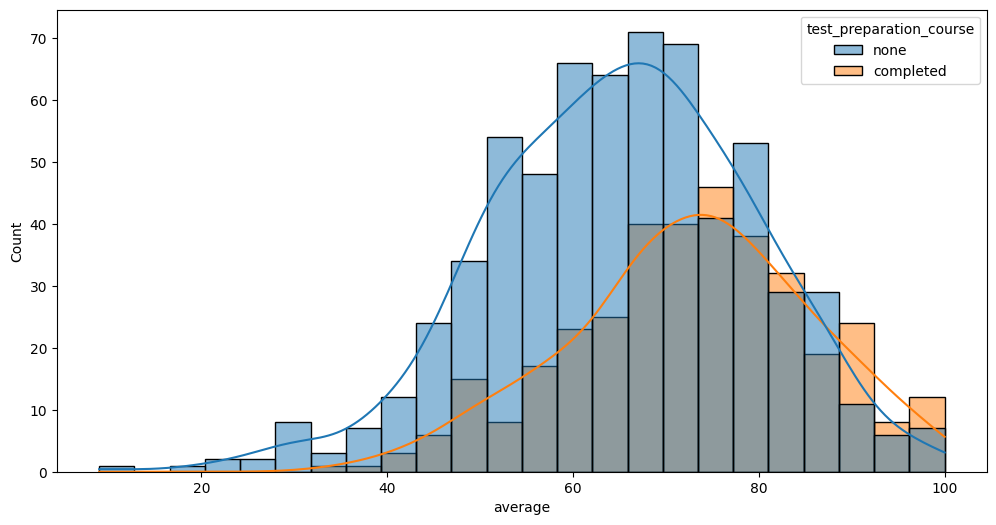

In [117]:
plt.figure(figsize=(12,6))
sns.histplot(data=df , x='average' , hue='test_preparation_course' , kde=True)

Text(0.5, 1.0, 'Female')

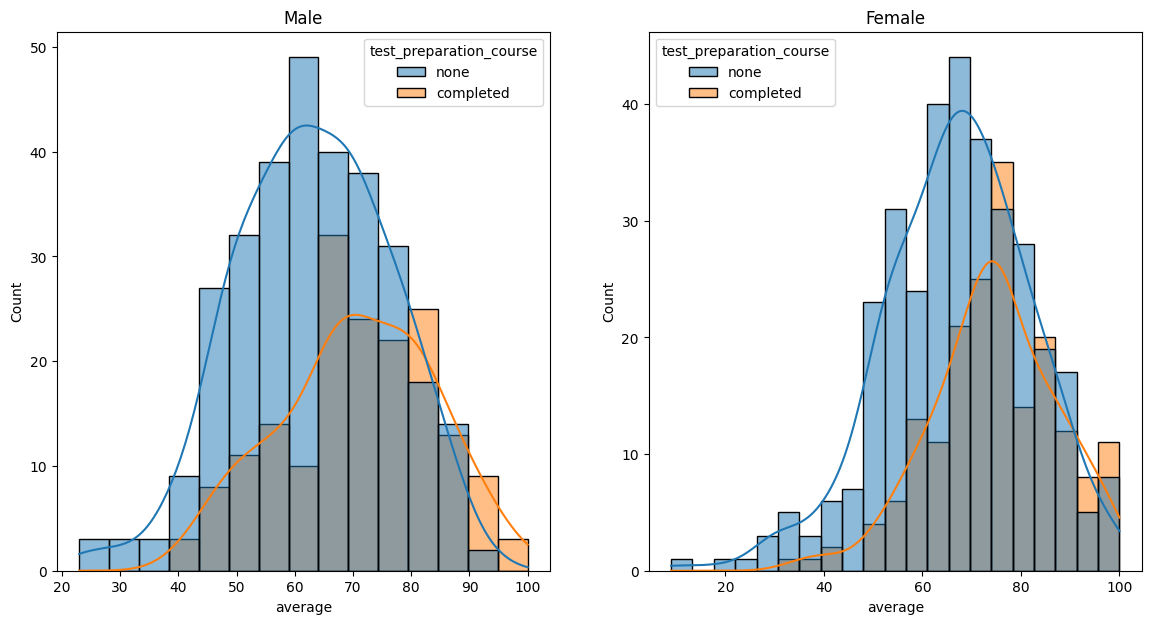

In [118]:
fig , ax = plt.subplots(1,2 , figsize=(14,7))

plt.subplot(121)
sns.histplot(data=df[df['gender']=='male'] , x='average' , hue='test_preparation_course' , kde=True)
plt.title('Male')

plt.subplot(122)
sns.histplot(data=df[df['gender']=='female'] , x='average' , hue='test_preparation_course' , kde=True)
plt.title('Female')

* Students who completed test preparation course perfrom better

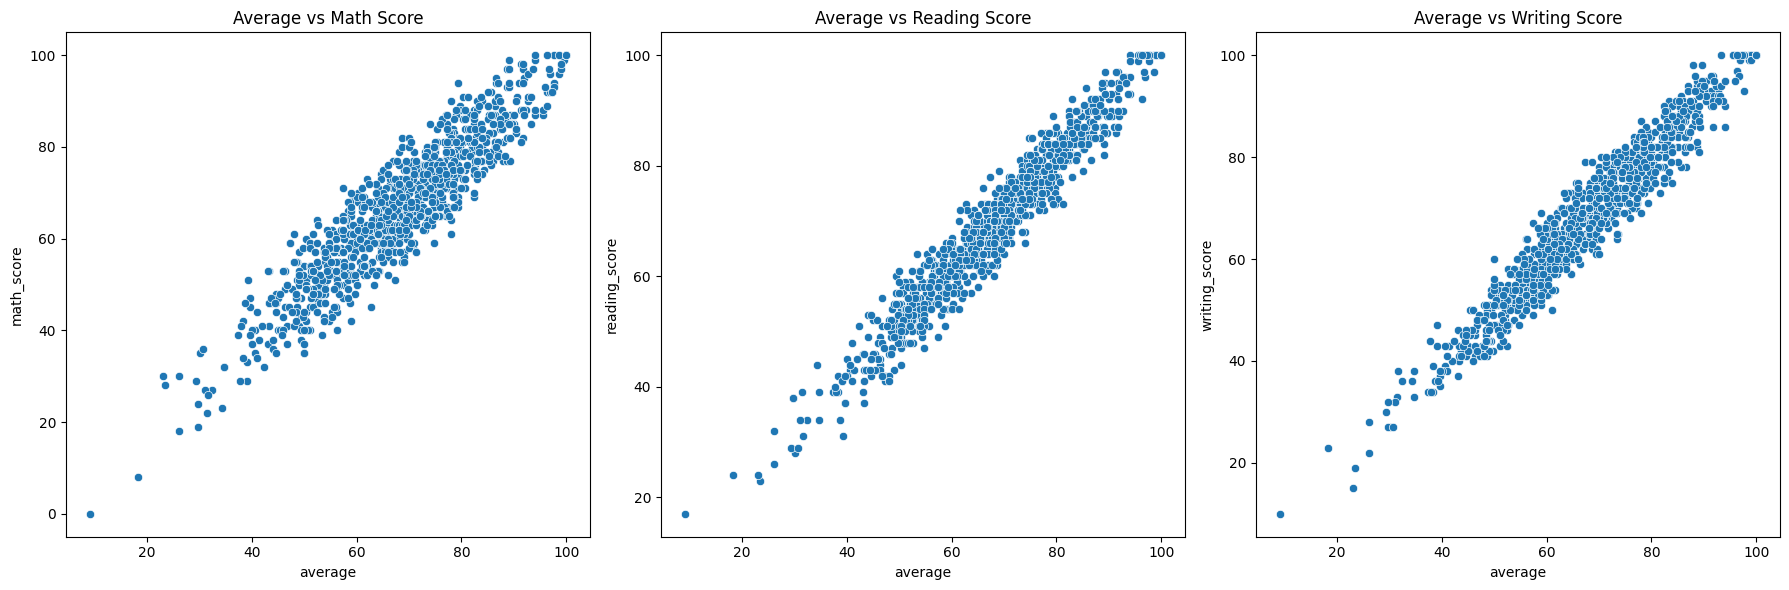

In [119]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=df, x='average', y='math_score', ax=ax[0])
ax[0].set_title("Average vs Math Score")

sns.scatterplot(data=df, x='average', y='reading_score', ax=ax[1])
ax[1].set_title("Average vs Reading Score")

sns.scatterplot(data=df, x='average', y='writing_score', ax=ax[2])
ax[2].set_title("Average vs Writing Score")

plt.tight_layout()
plt.show()


All score show linear relationship with average score

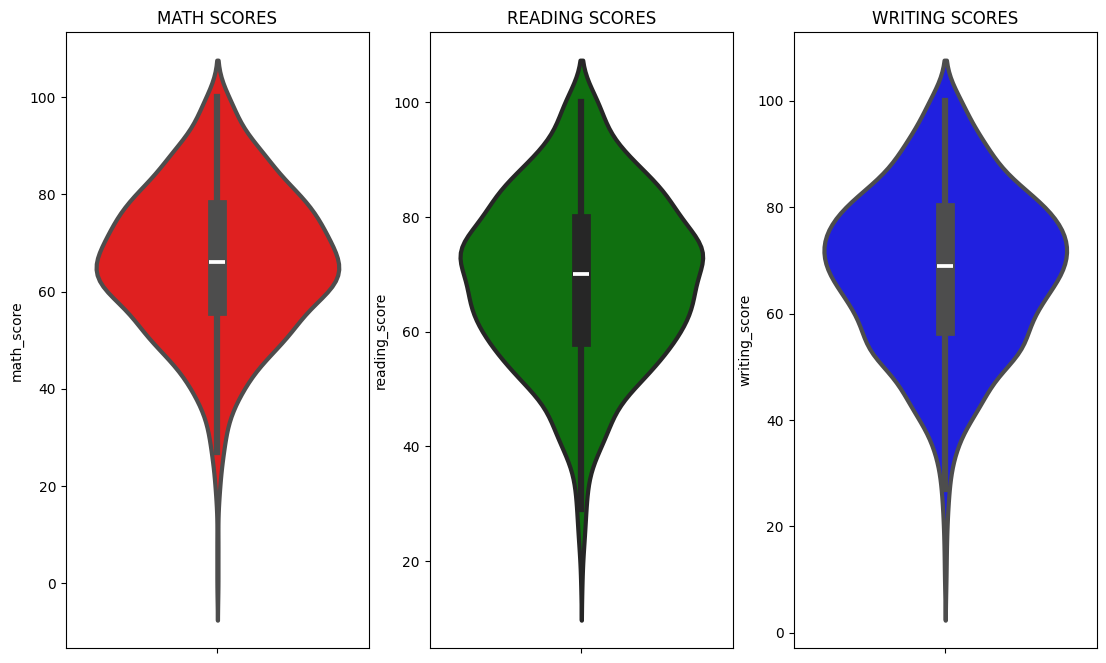

In [131]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

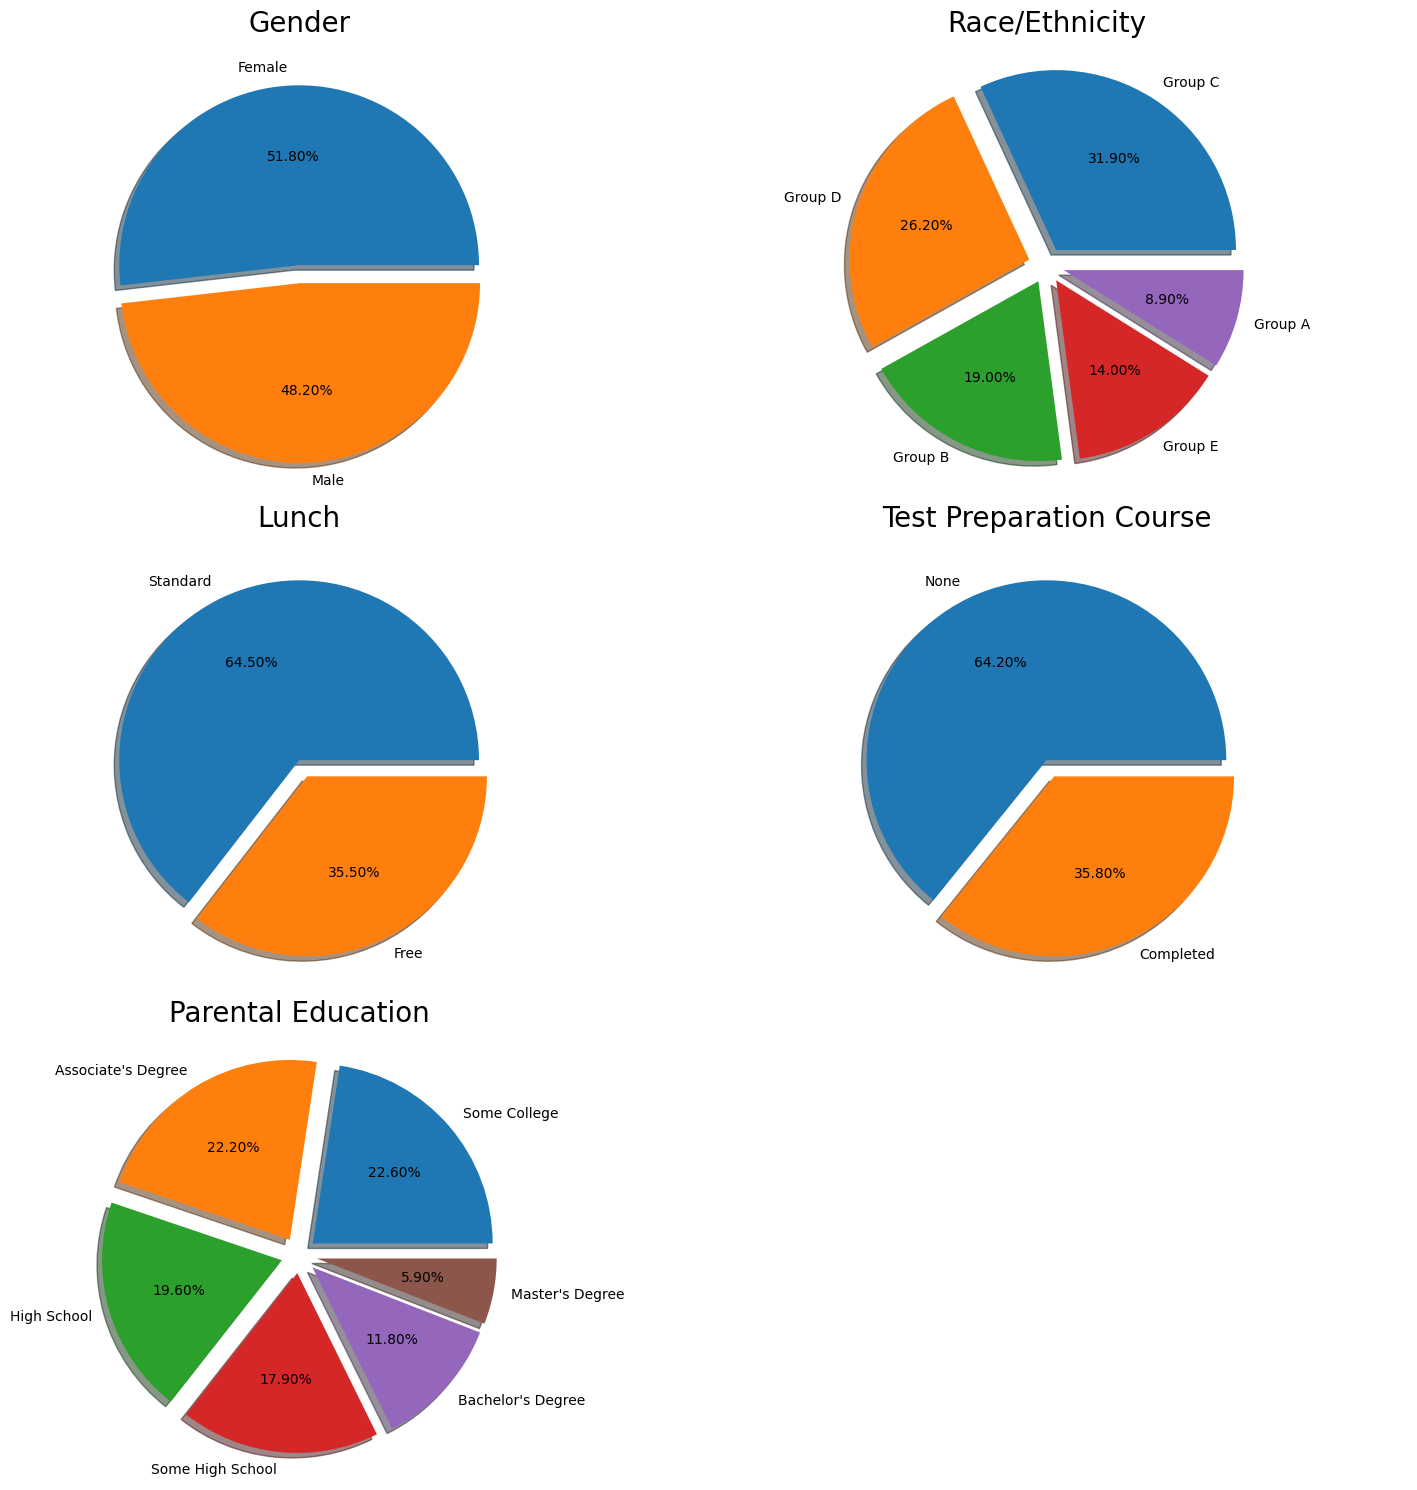

In [147]:
# Set global figure size
plt.rcParams['figure.figsize'] = (15, 15)

# Create a 3x2 grid for subplots
fig, ax = plt.subplots(3, 2)

# Gender Pie Chart
size = df['gender'].value_counts()
labels = ['Female', 'Male']
ax[0, 0].pie(size, labels=labels, autopct='%1.2f%%' , explode=[0,0.1] , shadow=True)
ax[0, 0].set_title('Gender', fontsize=20)
ax[0, 0].axis('off')

# Race/Ethnicity Pie Chart
size = df['race_ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
ax[0, 1].pie(size , labels=labels, autopct='%1.2f%%', explode=[0.1,0.1,0.1,0.1,0.1] , shadow=True)
ax[0, 1].set_title('Race/Ethnicity', fontsize=20)
ax[0, 1].axis('off')

# Lunch Pie Chart
size = df['lunch'].value_counts()
labels = ['Standard', 'Free']
ax[1, 0].pie(size, labels=labels, autopct='%1.2f%%', explode=[0,0.1] , shadow=True)
ax[1, 0].set_title('Lunch', fontsize=20)
ax[1, 0].axis('off')

# Test Preparation Course Pie Chart
size = df['test_preparation_course'].value_counts()
labels = ['None', 'Completed']
ax[1, 1].pie(size, labels=labels, autopct='%1.2f%%', explode=[0,0.1] , shadow=True)
ax[1, 1].set_title('Test Preparation Course', fontsize=20)
ax[1, 1].axis('off')

# Parental Level of Education Pie Chart
size = df['parental_level_of_education'].value_counts()
labels = [
    'Some College',
    "Associate's Degree",
    'High School',
    'Some High School',
    "Bachelor's Degree",
    "Master's Degree",
]
ax[2, 0].pie(size, labels=labels, autopct='%1.2f%%', explode=[0.1,0.1,0.1,0.1,0.1,0.1] , shadow=True)
ax[2, 0].set_title('Parental Education', fontsize=20)
ax[2, 0].axis('off')

# Turn off the last empty subplot
ax[2, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

* Number of males and females are almost similar
* Group C & D have most number of students
* Most of the students have standard lunch
* More number of students were not enrolled in any test course
* Master's Degree & Bachelor's Degree are lesser than compared to others

# Univariate Analysis

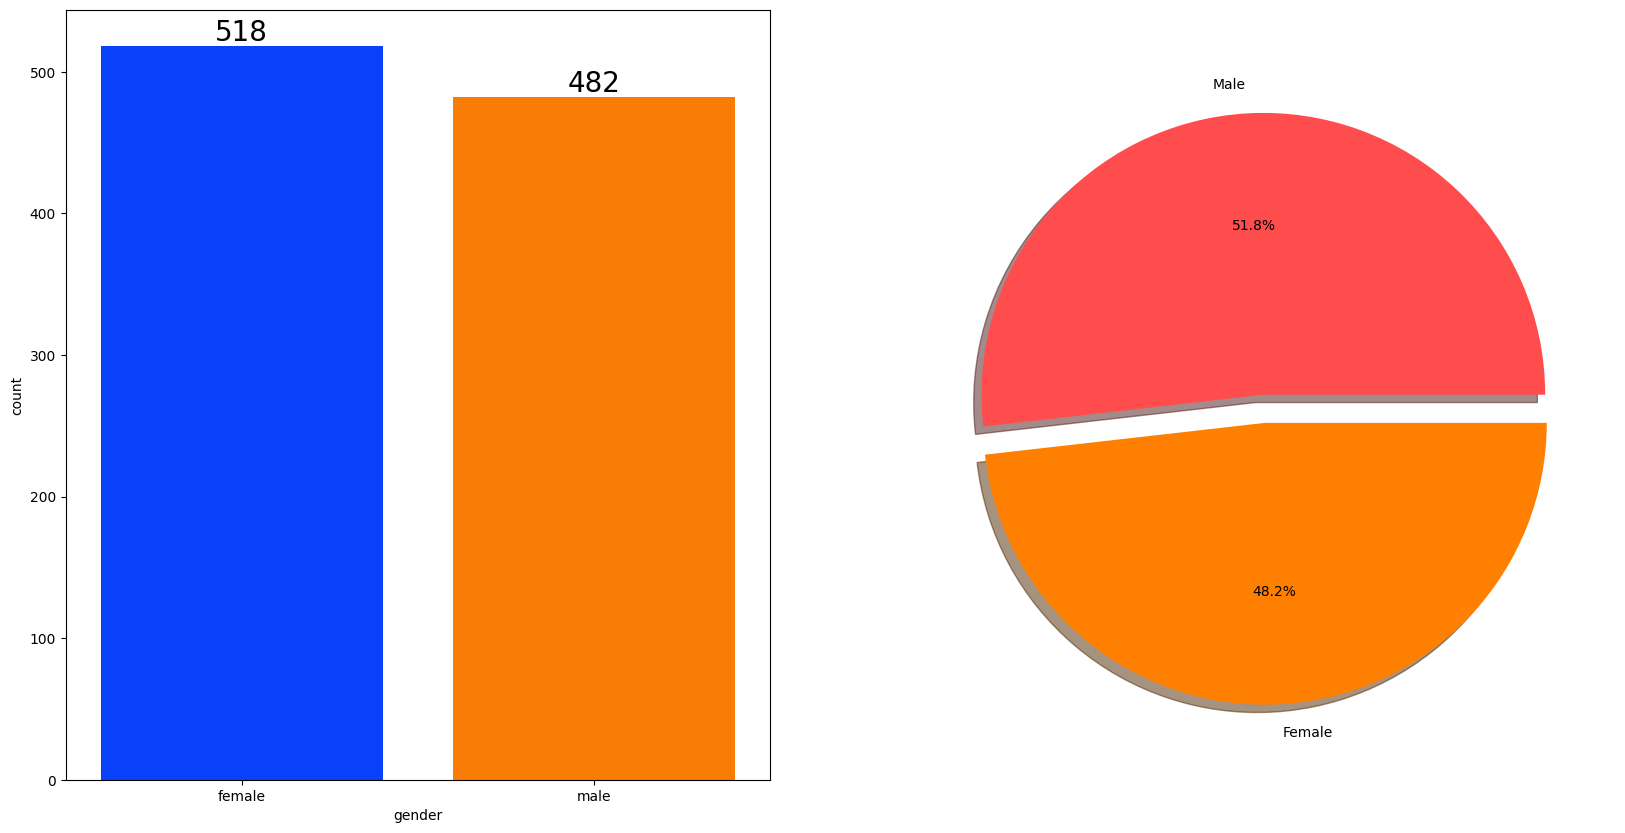

In [156]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

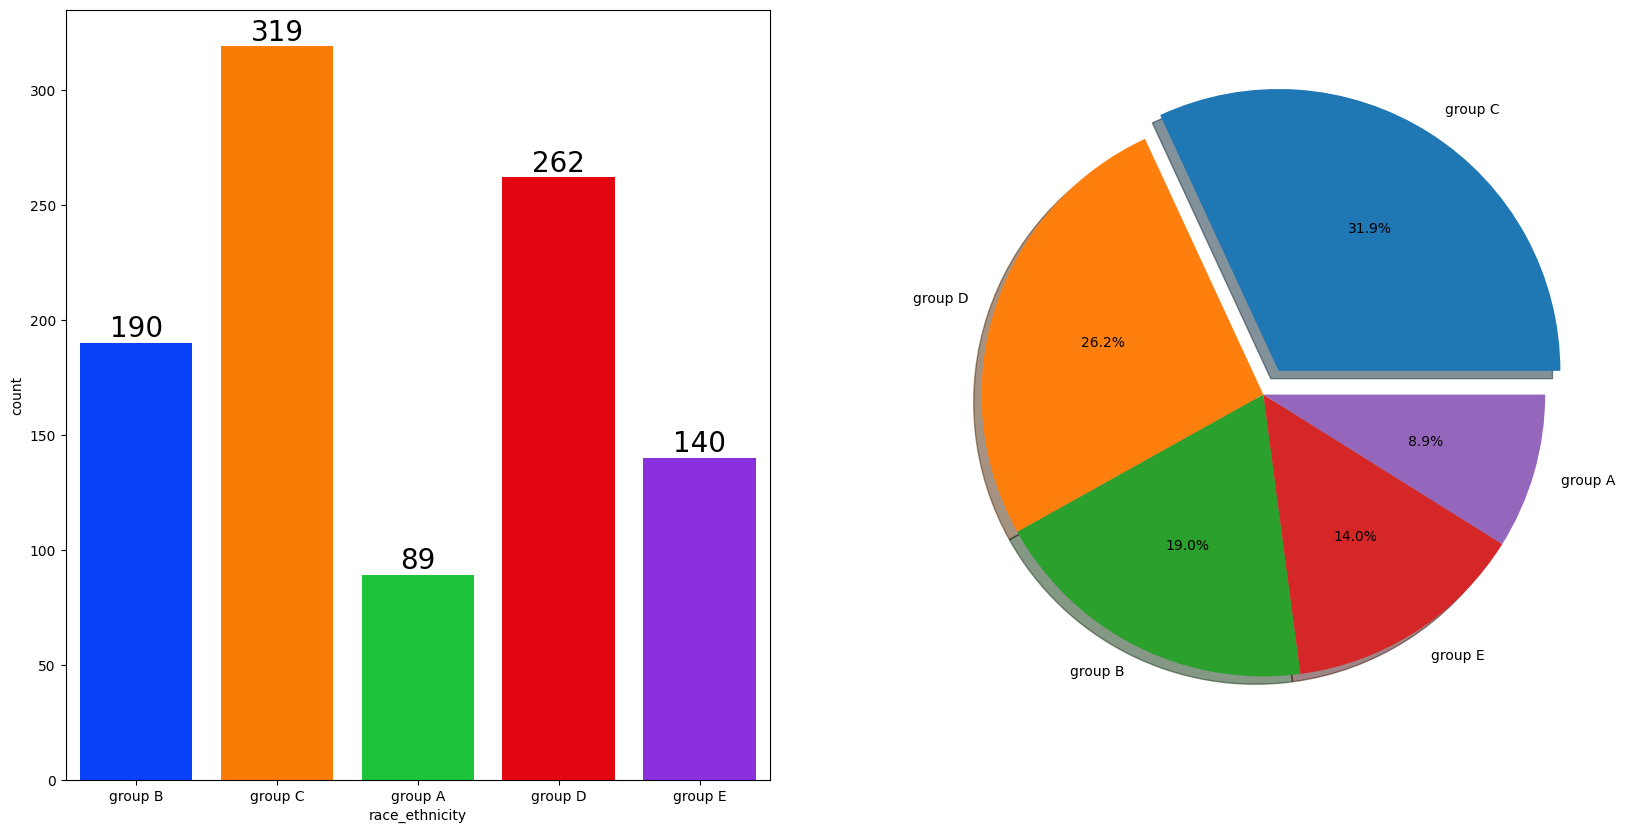

In [157]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

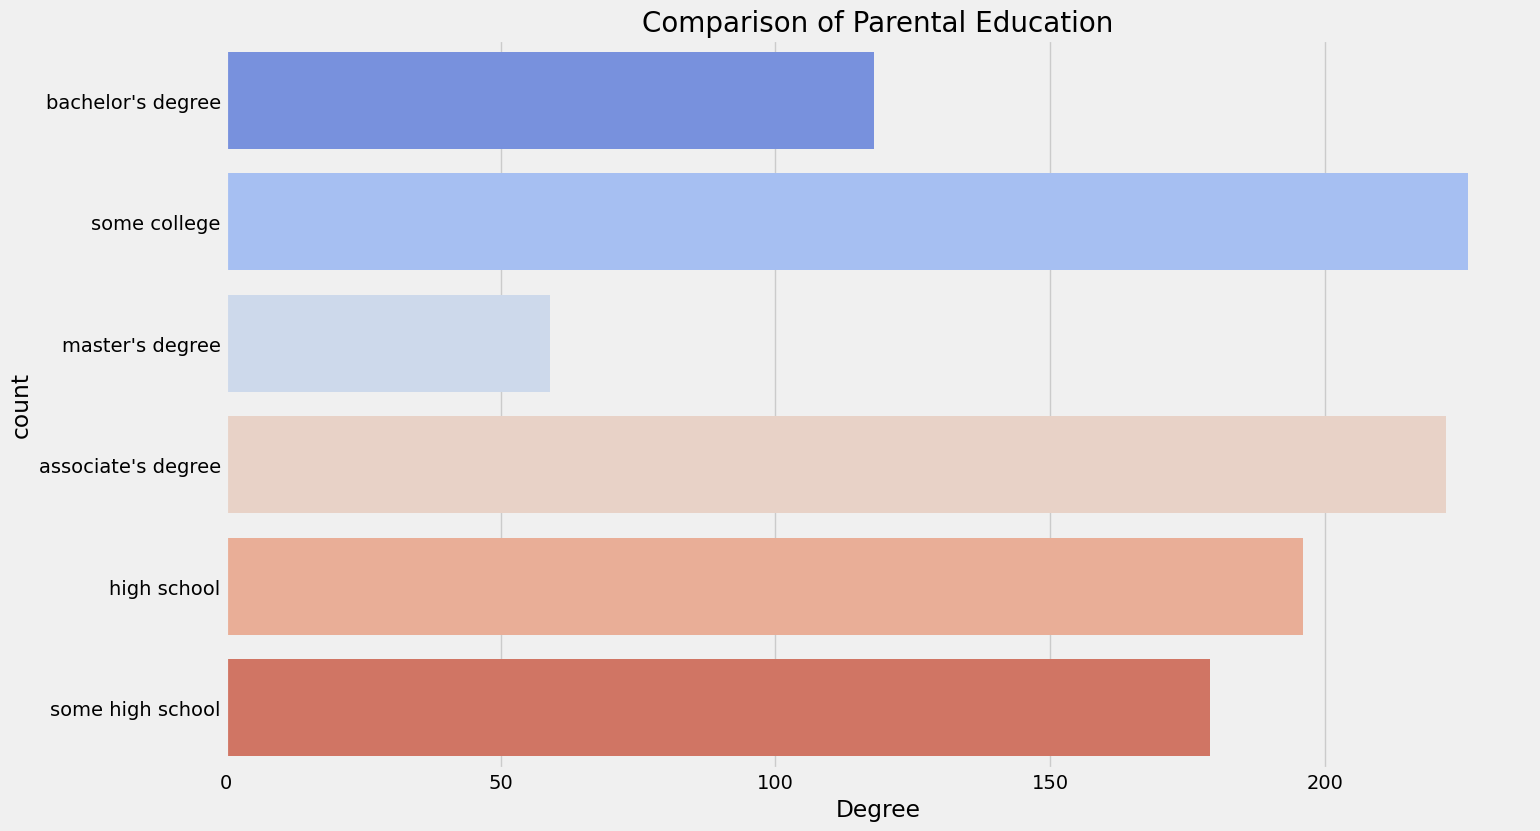

In [168]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'coolwarm')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

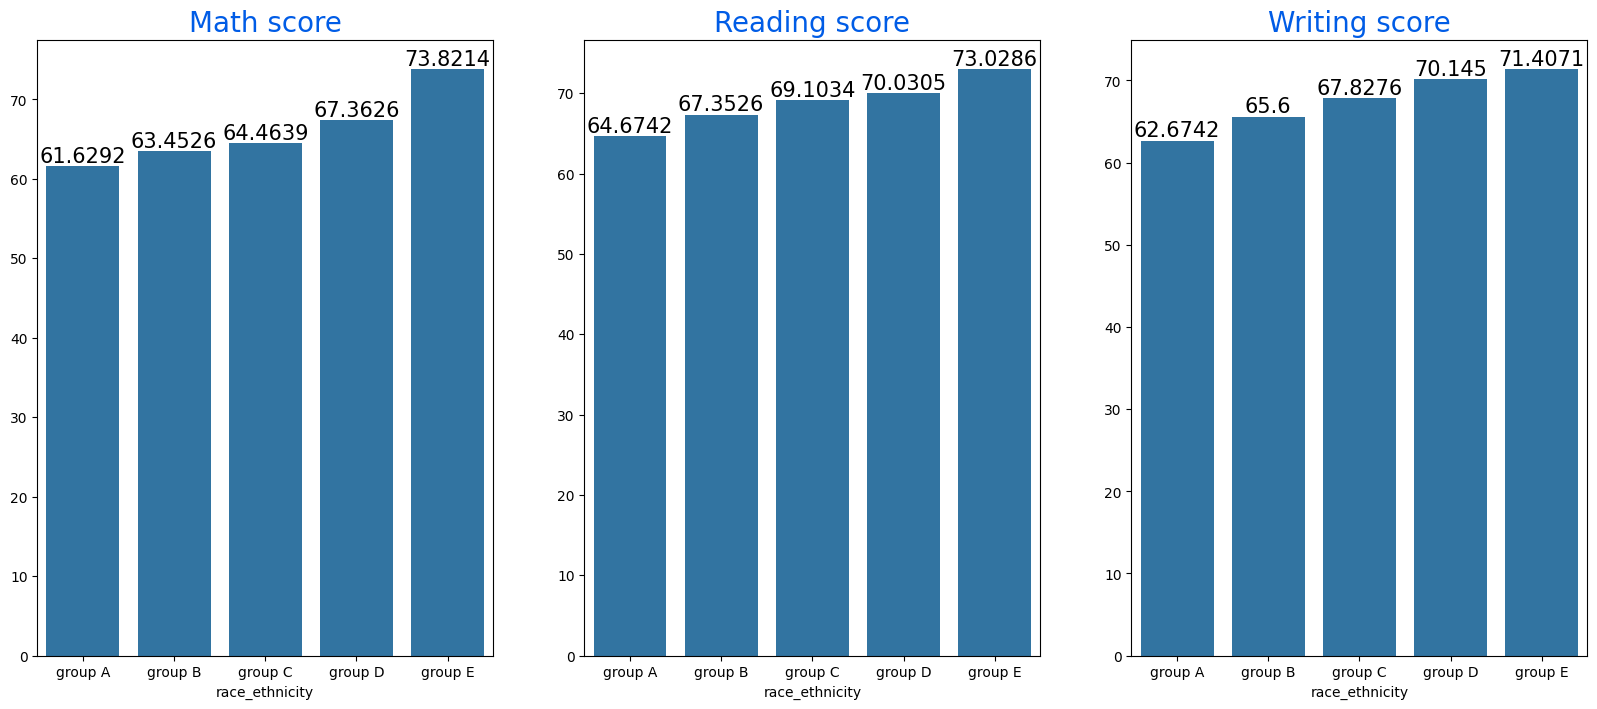

In [160]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

# Pair-plot

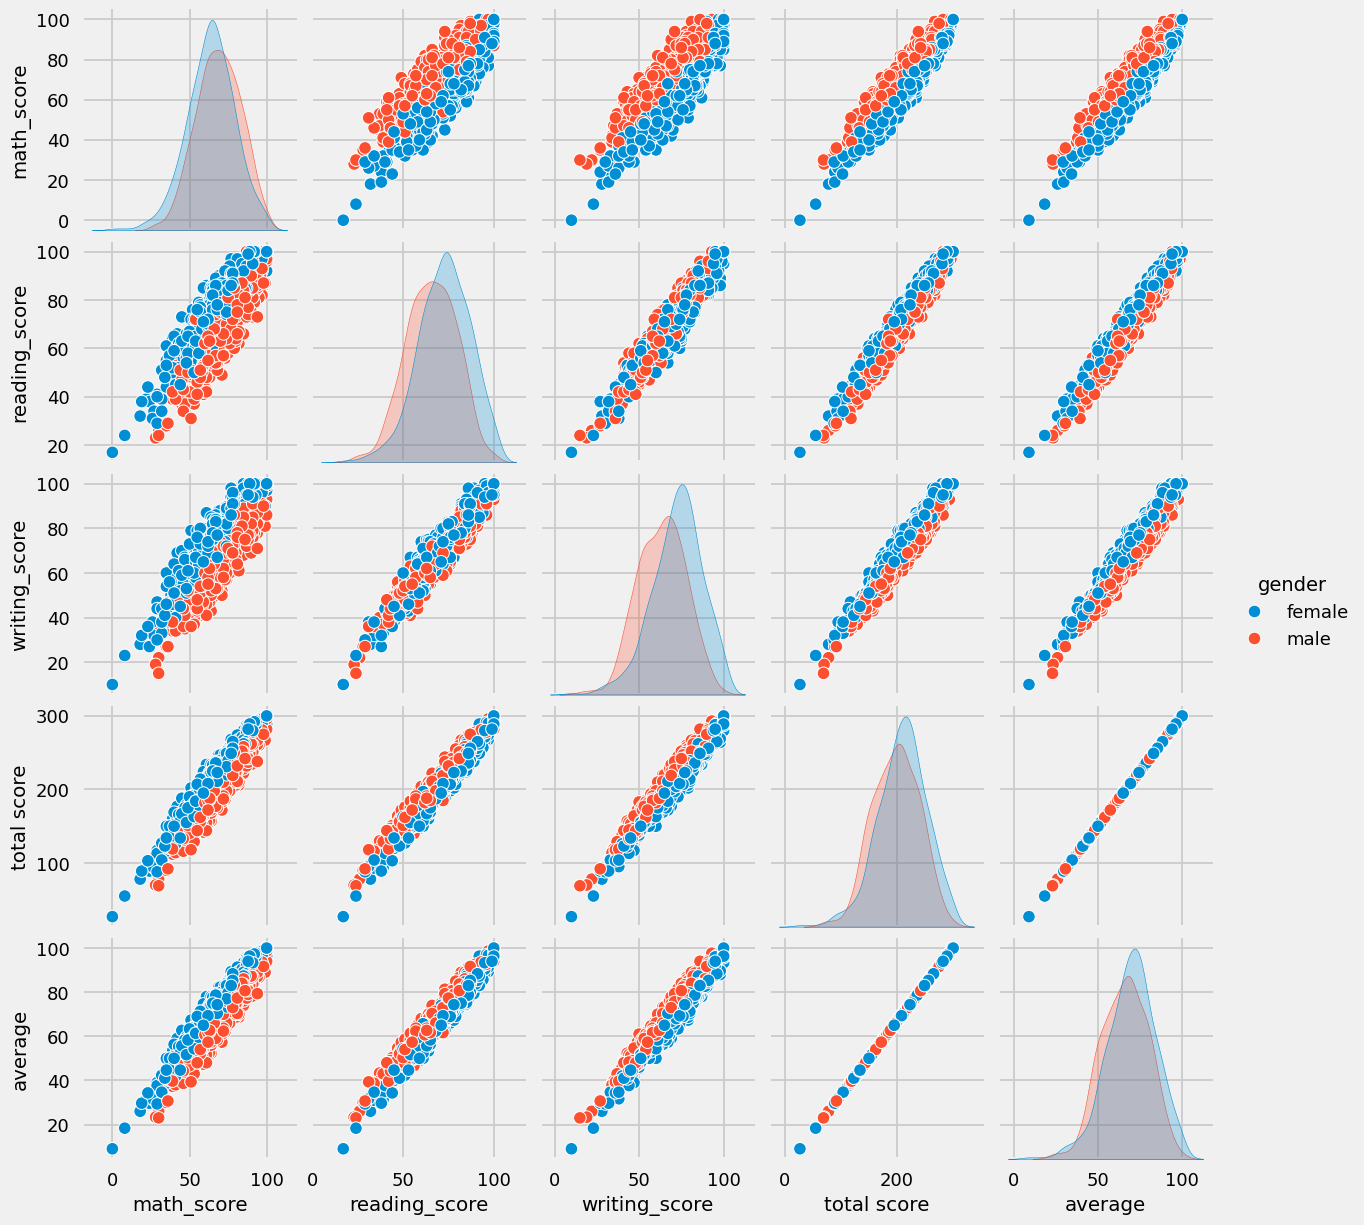

In [172]:
sns.pairplot(df,hue = 'gender')
plt.show()

# Conclusion
* We can say that all columns affect Student's performance except parental level of education